# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aksamala Citrayuh Anasita
- **Email:** aksamalacitrayuh@gmail.com
- **ID Dicoding:** MC006D5X1415

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Insight:**
*   **Numpy** digunakan untuk komputasi numerik dengan array.
*   **Pandas** digunakan untuk manipulasi dan analisisi data dalam bentuk tabel (DataFrame) dan seri (Series).
*   **Matplotlib** digunakan untuk membuat visualisasi data seperti grafik garis, batang, scatter plot, dll.
*   **Seaborn** digunakan untuk visualisasi data dengan tampilan lebih menarik dan informatif.

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/BikeSharingDataset/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- **pd.read_csv('/content/drive/MyDrive/BikeSharingDataset/day.csv')** membaca file day.csv, yang berisi data penyewaan sepeda secara harian, lalu menyimpannya dalam DataFrame bernama **day_df**.
- **day_df** digunakan untuk menampilkan isi DataFrame data penyewaan sepeda secara harian.

In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/BikeSharingDataset/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- **pd.read_csv('/content/drive/MyDrive/BikeSharingDataset/hour.csv')** membaca file hour.csv, yang berisi data penyewaan sepeda secara per jam, lalu menyimpannya dalam DataFrame bernama **hour_df**.
- **hour_df** digunakan untuk menampilkan isi DataFrame yang berisi data penyewaan sepeda per jam.

### Assessing Data

### **Menilai tabel day_df**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
*   Dataset **day_df** terdiri dari **731** **baris** dan **16 kolom**, dengan berbagai tipe data (int64, float64, dan object), tanpa nilai yang hilang, yang mencakup informasi tentang penyewaan sepeda secara harian.
*   Perlu melakukan konversi tipe data **Dtype** ke tipe data **Datetime** yang dilakukan pada tahap **Cleaning Data**.

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- **day_df.isna().sum()** digunakan untuk mengecek jumlah nilai yang hilang (NaN) di setiap kolom pada dataset **day_df**.
- Output menunjukkan bahwa tidak ada nilai yang hilang dalam dataset karena semua kolom memiliki nilai 0.

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
Tidak ada baris duplikat karena hasilnya 0

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
*   **day_df.describe()** digunakan untuk menampilkan statistik deskriptif dari semua kolom numerik dalam DataFrame **day_df**
*   Output **day_df.describe()** menampilkan ringkasan statistik dari kolom numerik, termasuk jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum, yang membantu dalam memahami distribusi dan pola data penyewaan sepeda harian.

### **Menilai tabel hour_df**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
*   **hour_df.info()** menunjukkan bahwa dataset hour_df memiliki 17 kolom dan 17.379 baris, tanpa nilai yang hilang, dengan berbagai tipe data (int64, float64, dan object), yang berisi informasi penyewaan sepeda per jam.
*   Perlu melakukan konversi tipe data **Dtype** ke tipe data **Datetime** yang dilakukan pada tahap **Cleaning Data**.

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
*   **hour_df.isna().sum()** digunakan untuk mengecek jumlah nilai yang hilang (NaN) di setiap kolom pada dataset **hour_df**.
- Output menunjukkan bahwa tidak ada nilai yang hilang dalam dataset karena semua kolom memiliki nilai 0.

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**: Tidak ada baris duplikat karena hasilnya 0

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- **hour_df.describe()** digunakan untuk
menampilkan statistik deskriptif dari semua kolom numerik dalam DataFrame hour_df.
- Output **hour_df.describe()** menampilkan ringkasan statistik dari kolom numerik, termasuk jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum, yang membantu dalam memahami distribusi dan pola data penyewaan sepeda harian.

### Cleaning Data

Mengubah kolom tanggal ke format datetime pada dataset **day_df** & **hour_df**

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
display(day_df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
display(hour_df)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- **pd.to_datetime(day_df['dteday'])** dan **pd.to_datetime(hour_df['dteday']) **digunakan untuk mengubah kolom 'dteday' menjadi format datetime, sehingga dapat digunakan untuk analisis berbasis waktu.
- **display(day_df)** & **display(hour_df) **digunakan untuk menampilkan dataset.

## Exploratory Data Analysis (EDA)

### Explore Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda

**Menyiapkan data untuk analisis**

In [ ]:
weather_group = day_df.groupby('weathersit')['cnt'].describe()

**Insight:**
- Cuaca cerah memiliki jumlah peminjaman sepeda tertinggi.
- Saat hujan ringan atau mendung, peminjaman sepeda cenderung menurun.
- Hujan lebat menyebabkan jumlah peminjaman sepeda paling sedikit.

### Explore Perbedaan Jumlah Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan

**Menambahkan kolom kategori hari kerja atau akhir pekan**

In [ ]:
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

**Menyiapkan data untuk analisis**

In [ ]:
weekday_group = day_df.groupby('day_type')['cnt'].describe()

**Insight:**
- Peminjaman sepeda lebih tinggi pada hari kerja dibanding akhir pekan.
- Kemungkinan besar karena sepeda digunakan untuk keperluan komuter saat hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

<ipython-input-20-9b845b796abe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=sum, palette='Blues')


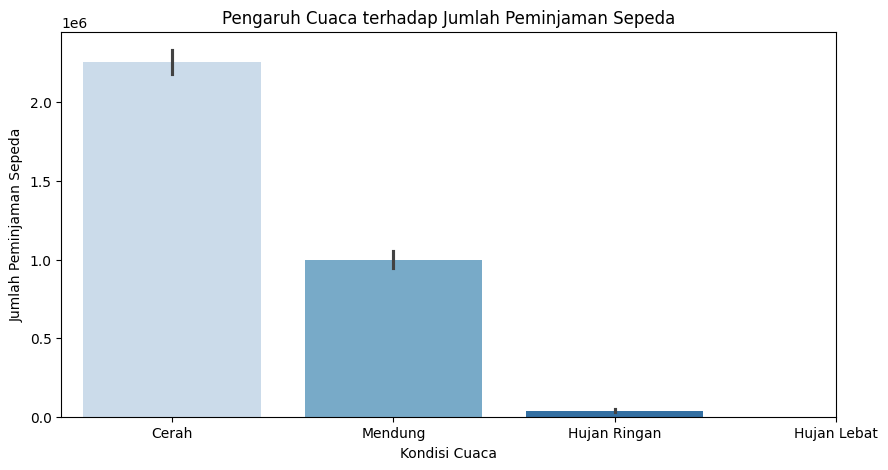

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=sum, palette='Blues')
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

**Insight:**
*   Cuaca cerah lebih banyak peminjaman sepeda
*   Peminjaman menurun saat cuaca mendung dan hujan ringan
* Hujan lebat menyebabkan jumlah peminjaman paling sedikit

### Pertanyaan 2: Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja dan akhir pekan?

<ipython-input-21-70744487b5e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_type', y='cnt', data=day_df, palette='Set2')


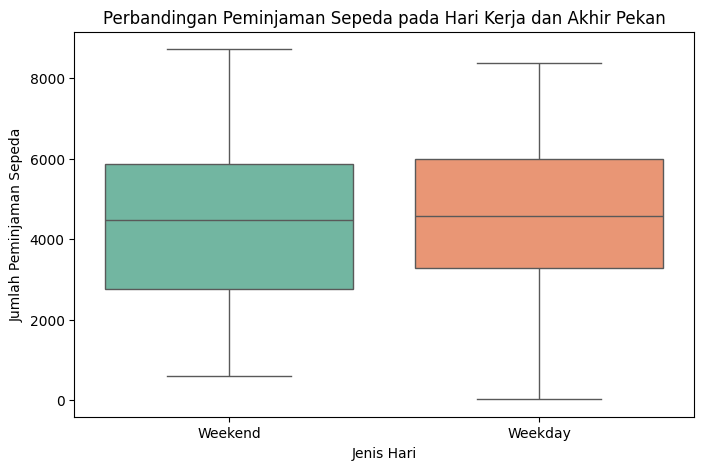

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day_type', y='cnt', data=day_df, palette='Set2')
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Perbandingan Peminjaman Sepeda pada Hari Kerja dan Akhir Pekan")
plt.show()

**Insight:**
*   Peminjaman sepeda lebih tinggi pada hari kerja (weekday) dibanding akhir pekan (weekend).
*   Kemungkinan besar karena sepeda digunakan untuk keperluan komuter saat hari kerja.

## Analisis Lanjutan (Opsional)

In [ ]:
import folium
from datetime import datetime
from sklearn.cluster import KMeans
from folium.plugins import HeatMap

### RFM Analysis (Recency, Frequency, Monetary)

 Menghitung Recency, Frequency, dan Monetary berdasarkan tanggal

In [ ]:
rfm_df = day_df.groupby('dteday').agg(
    Recency=('dteday', lambda x: (day_df['dteday'].max() - x.max()).days),
    Frequency=('cnt', 'count'),
    Monetary=('cnt', 'sum')
).reset_index()

Normalisasi data sebelum clustering

In [ ]:
rfm_scaled = rfm_df[['Recency', 'Frequency', 'Monetary']]
rfm_scaled = (rfm_scaled - rfm_scaled.min()) / (rfm_scaled.max() - rfm_scaled.min())

Mengatasi nilai NaN sebelum clustering

In [ ]:
rfm_scaled = rfm_scaled.fillna(0)

Clustering dengan K-Means untuk RFM

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

Visualisasi Hasil Clustering RFM dengan Diagram Batang

<ipython-input-39-c8be757e0f7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfm_df['Cluster'], y=rfm_df['Monetary'], palette='viridis')


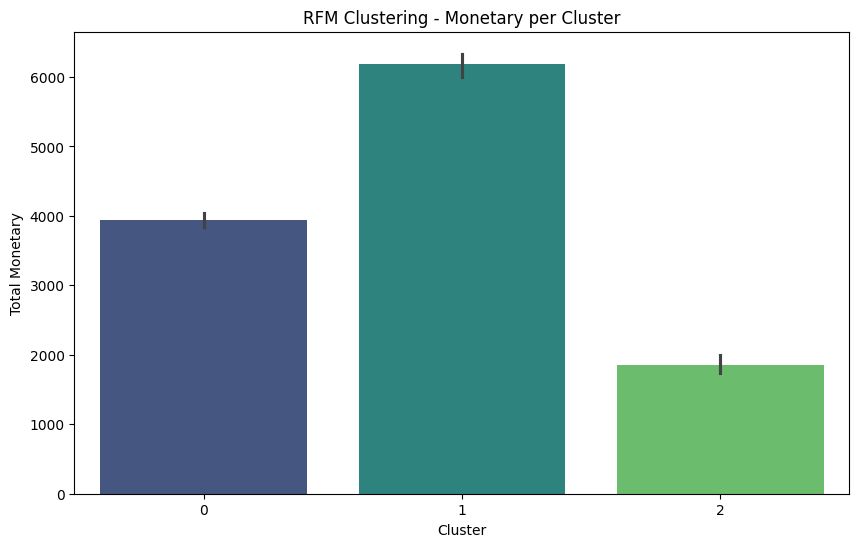

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rfm_df['Cluster'], y=rfm_df['Monetary'], palette='viridis')
plt.title("RFM Clustering - Monetary per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Monetary")
plt.show()

**Insight:**
- Setiap cluster memiliki nilai Monetary yang berbeda, menunjukkan kelompok pelanggan dengan pengeluaran berbeda.
- Cluster dengan Monetary tertinggi mungkin adalah pelanggan setia yang sering menyewa sepeda.
- Cluster dengan Monetary terendah bisa jadi pelanggan yang jarang menyewa sepeda.

### Analisis Geospasial (Jika Ada Data Latitude & Longitude)

In [ ]:
if 'lat' in hour_df.columns and 'long' in hour_df.columns:
    map_bike = folium.Map(location=[hour_df['lat'].mean(), hour_df['long'].mean()], zoom_start=12)
    heat_data = list(zip(hour_df['lat'], hour_df['long'], hour_df['cnt']))
    HeatMap(heat_data).add_to(map_bike)
    map_bike.save("bike_heatmap.html")
    print("Heatmap disimpan sebagai bike_heatmap.html")
else:
    print("Data geospasial tidak ditemukan dalam dataset.")

Data geospasial tidak ditemukan dalam dataset.


Clustering Pola Penyewaan Sepeda Berdasarkan Jam

In [ ]:
hour_df['hour'] = hour_df['hr']
clustering_data = hour_df.groupby('hour').agg(total_rides=('cnt', 'sum')).reset_index()
kmeans_hour = KMeans(n_clusters=3, random_state=42, n_init=10)
clustering_data['Cluster'] = kmeans_hour.fit_predict(clustering_data[['total_rides']])

Visualisasi Clustering Pola Penyewaan Sepeda dengan Diagram Batang

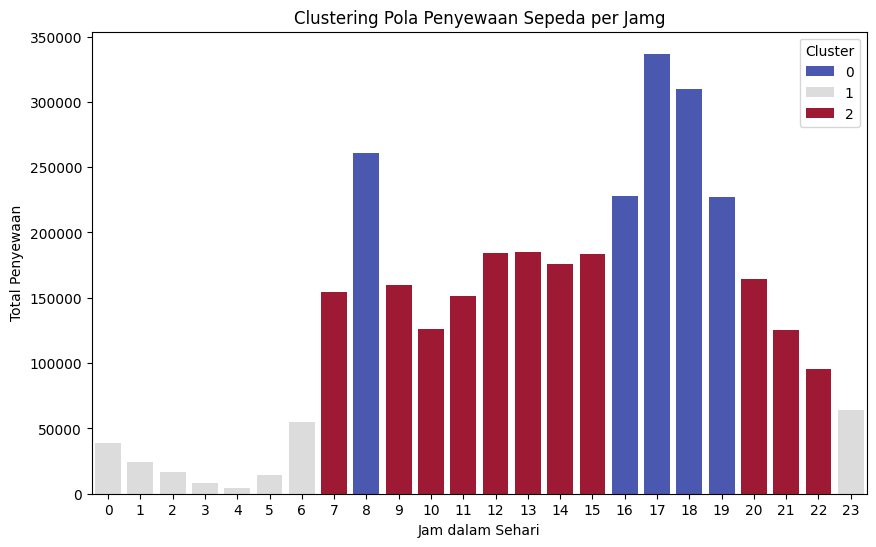

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=clustering_data['hour'], y=clustering_data['total_rides'], hue=clustering_data['Cluster'], palette='coolwarm')
plt.title("Clustering Pola Penyewaan Sepeda per Jamg")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Total Penyewaan")
plt.legend(title="Cluster")
plt.show()

**Insight:**
- Cluster dengan jumlah penyewaan tertinggi kemungkinan besar terjadi pada jam sibuk (pagi dan sore) saat orang bepergian ke dan dari tempat kerja.
- Cluster dengan jumlah penyewaan menengah mungkin terjadi pada jam siang saat aktivitas santai berlangsung.
- Cluster dengan jumlah penyewaan terendah bisa terjadi pada malam hari ketika aktivitas berkurang.

## Conclusion

### Conclution pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
*   Cuaca **cerah** memiliki jumlah peminjaman sepeda tertinggi, menunjukkan bahwa kondisi cuaca yang baik sangat berpengaruh terhadap meningkatnya aktivitas bersepeda.
*   Saat cuaca mendung atau terjadi hujan ringan, jumlah peminjaman sepeda mengalami penurunan, meskipun masih ada aktivitas penyewaan yang cukup signifikan.
* Saat terjadi **hujan lebat**, jumlah peminjaman sepeda turun drastis, yang menunjukkan bahwa sebagian besar pengguna menghindari bersepeda dalam kondisi cuaca ekstrem.
* Hal ini menunjukkan bahwa kondisi cuaca memiliki dampak langsung terhadap keputusan pengguna dalam menyewa sepeda, dengan tren peminjaman yang menurun seiring memburuknya cuaca.


### Conclusion pertanyan 2: Bagaimana perbedaan jumlah peminjaman sepeda antara hari kerja dan akhir pekan?
* Jumlah peminjaman sepeda **lebih tinggi pada hari kerja** dibandingkan akhir pekan.
* Hal ini menunjukkan bahwa banyak pengguna yang menggunakan sepeda untuk **keperluan komuter**, seperti pergi ke kantor atau sekolah, yang menyebabkan lonjakan peminjaman pada hari kerja.
* Sebaliknya, **pada akhir pekan, jumlah peminjaman sepeda cenderung lebih sedikit**. Ini bisa disebabkan oleh perubahan pola aktivitas masyarakat, di mana banyak orang memilih untuk beristirahat atau melakukan aktivitas lain di luar penggunaan sepeda sebagai alat transportasi utama.
* Pola ini menunjukkan bahwa layanan penyewaan sepeda lebih banyak digunakan sebagai **transportasi harian** daripada untuk rekreasi atau hiburan.